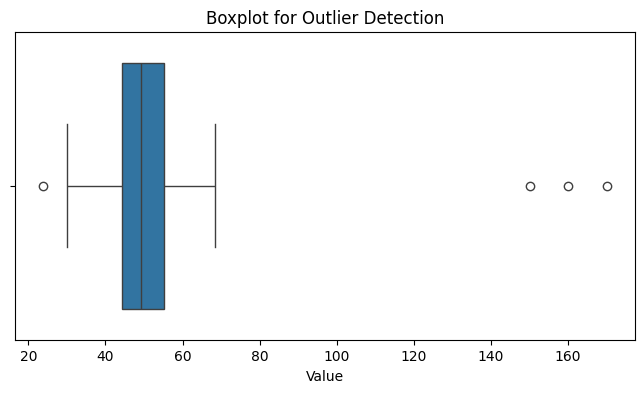

Combined Outliers Detected:
           Value  Z_outlier  IQR_outlier
74    23.802549      False         True
100  150.000000       True         True
101  160.000000       True         True
102  170.000000       True         True


In [1]:
# Question: Combining Multiple Outlier Detection Methods
# Description: Combine Z-score, IQR, and Boxplot methods to detect and compare outliers in adataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Sample dataset
np.random.seed(42)
data = pd.DataFrame({
    'Value': np.concatenate([np.random.normal(50, 10, 100), [150, 160, 170]])  # Adding outliers
})

# --- Z-score Method ---
data['Z_score'] = zscore(data['Value'])
data['Z_outlier'] = data['Z_score'].abs() > 3

# --- IQR Method ---
Q1 = data['Value'].quantile(0.25)
Q3 = data['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['IQR_outlier'] = (data['Value'] < lower_bound) | (data['Value'] > upper_bound)

# --- Boxplot Visualization ---
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Value'])
plt.title('Boxplot for Outlier Detection')
plt.show()

# --- Combine Outliers ---
data['Combined_Outlier'] = data[['Z_outlier', 'IQR_outlier']].any(axis=1)

# Display summary
outliers = data[data['Combined_Outlier']]
print("Combined Outliers Detected:\n", outliers[['Value', 'Z_outlier', 'IQR_outlier']])

# Optionally: export to CSV
# outliers.to_csv('detected_outliers.csv', index=False)

